In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from lightgbm import LGBMClassifier# classification
from sklearn.metrics import accuracy_score
import seaborn as sns


In [158]:
#importing our data
gender = pd.read_csv (r'C:\Users\COSEKE\Desktop\AI&ML\gender_submission.csv')
test = pd.read_csv (r'C:\Users\COSEKE\Desktop\AI&ML\test.csv')
train = pd.read_csv (r'C:\Users\COSEKE\Desktop\AI&ML\train.csv')                   

In [112]:
#lets check the data shapes
#gender datashape,test shape,train shape
gender.shape, test.shape,train.shape

((418, 2), (418, 11), (891, 12))

In [113]:
#inspecting the first 10 rows of gender dataset
gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [114]:
#inspecting the first rows or train dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [115]:
#inspecting the first rows or train dataset
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [116]:
#inspecting the columns
gender.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [117]:
#inspecting the columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
#inspecting the columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [118]:
#checking for null values and duplicates too

gender.isnull().any()
gender.duplicated().any()

False

In [119]:
train.isnull().any()
train.duplicated().sum()
#we have 3 columns with null values

0

In [53]:
test.isnull().any()
#test.duplicated().any()
#we have columns with missing values

passengerid    False
pclass         False
name           False
sex            False
age             True
sibsp          False
parch          False
ticket         False
fare            True
cabin           True
embarked       False
dtype: bool

In [ ]:
#lets clean our data

In [120]:
#Replacing spaces with underscores and upercase with lowercase
gender.columns = gender.columns.str.strip().str.lower().str.replace(' ', '_')
gender.head()

,passengerid,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [127]:
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_')
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_')
test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
#replace null values with mean
gender.describe()

,passengerid,survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [130]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
#train["age"].fillna(data["age"].mean(), inplace=True)
train.age
len(train)



891

In [132]:
cols = ["embarked"]
train[cols]=train[cols].fillna(train.mode().iloc[0])

In [66]:
train.embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [133]:
train["age"].fillna(train["age"].mean(), inplace=True)
train.isnull().sum().sort_values(ascending=False)/len(train)#check percentage of missing values and sort in ascending order

cabin          0.771044
embarked       0.000000
fare           0.000000
ticket         0.000000
parch          0.000000
sibsp          0.000000
age            0.000000
sex            0.000000
name           0.000000
pclass         0.000000
survived       0.000000
passengerid    0.000000
dtype: float64

In [134]:
test["age"].fillna(test["age"].mean(), inplace=True)
test.isnull().sum().sort_values(ascending=False)/len(test)

cabin          0.782297
fare           0.002392
embarked       0.000000
ticket         0.000000
parch          0.000000
sibsp          0.000000
age            0.000000
sex            0.000000
name           0.000000
pclass         0.000000
passengerid    0.000000
dtype: float64

In [135]:
len(test)

418

In [136]:

test["fare"].fillna(test["fare"].mean(), inplace=True)
test.fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: fare, Length: 418, dtype: float64

In [137]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [138]:
#dropping cabin column in train and test dataset since they value has a high percentage of missing values
train.drop("cabin",inplace=True,axis=1)

In [139]:
#inspecting the columns to check if the cabin column is dropped
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [85]:
#lets check our shapes again after cleaning the data
gender.isnull().any()
print("Gender null values:\n{}".format(gender.isnull().sum()))
print("Train null values:\n{}".format(train.isnull().sum()))
print("Test null values:\n{}".format(test.isnull().sum()))


Gender null values:
passengerid    0
survived       0
dtype: int64
Train null values:
passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64
Test null values:
passengerid    0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64


In [140]:

#lets check the new data shapes
gender.shape, test.shape, train.shape

((418, 2), (418, 11), (891, 11))

In [141]:
# Merge gender dataset to train and test sets
train_df= train.merge(gender, how = 'left', left_on='passengerid', right_on='passengerid')
test_df = test.merge(gender, how = 'left', left_on='passengerid', right_on='passengerid')


In [142]:
#check the data shapes once merged
train_df.shape,test_df.shape

((891, 12), (418, 12))

In [148]:
train_df.isnull().sum()

passengerid      0
survived_x       0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
embarked         0
survived_y     891
dtype: int64

In [144]:
test_df.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          327
embarked         0
survived         0
dtype: int64

In [149]:
#lets checkn survived_y column
train_df.columns

Index(['passengerid', 'survived_x', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'survived_y'],
      dtype='object')

In [152]:
train_df.survived_y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: survived_y, Length: 891, dtype: float64

In [153]:
#lets drop the survived_y column since it has 100% missing values
train_df.drop("survived_y", inplace=True, axis=1)

In [154]:
train_df.isnull().sum().any()

False

In [155]:
train_df.shape

(891, 11)

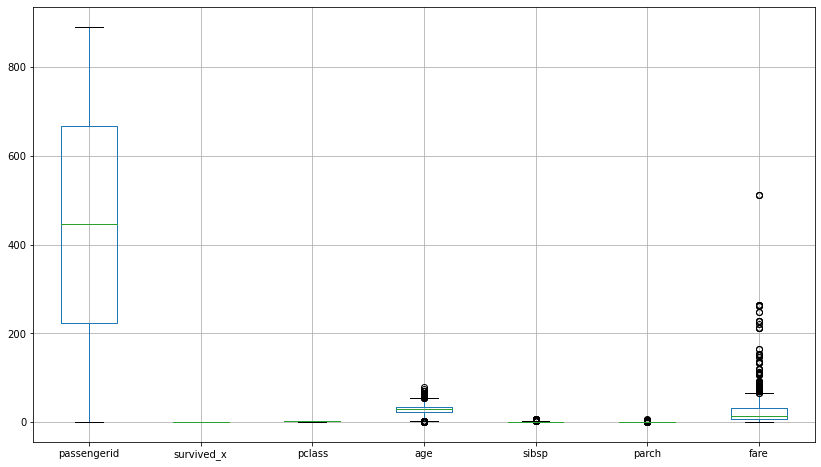

In [159]:
# Outliers
# checking for outliers
plt.figure(figsize = (14, 8))
train_df.boxplot()
plt.show()

In [162]:
#dropping unnecessary variables
train_df.drop("name", inplace=True, axis=1)

In [167]:
#dropping unnecessary variables
test_df.drop("name", inplace=True, axis=1)

In [193]:
#dropping unnecessary variables
test_df.drop("ticket", inplace=True, axis=1)

In [194]:
#dropping unnecessary variables
train_df.drop("ticket", inplace=True, axis=1)

In [195]:
#Exploratory Data Analysis
train_df.head()

,passengerid,survived_x,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [196]:
train_df.dtypes

passengerid      int64
survived_x       int64
pclass           int64
age            float64
sibsp            int64
parch            int64
fare           float64
sex_female       uint8
sex_male         uint8
embarked_C       uint8
embarked_Q       uint8
embarked_S       uint8
dtype: object

In [197]:
train_df.describe()

,passengerid,survived_x,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
test_df.head()

,passengerid,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,892,3,34.5,0,0,7.8292,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,1,0,0,0,1


In [170]:
test_df.describe()

,passengerid,pclass,age,sibsp,parch,fare,survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [178]:
test_df.dtypes

passengerid      int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
survived         int64
dtype: object

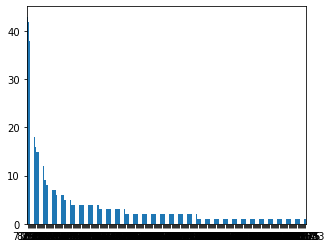

In [180]:
plt.figure(figsize = (5, 4))
train_df.fare.value_counts().plot(kind = 'bar', rot = 0);

In [177]:
test_df.isnull().sum().sort_values(ascending=False)/len(test_df)

cabin          0.782297
survived       0.000000
embarked       0.000000
fare           0.000000
ticket         0.000000
parch          0.000000
sibsp          0.000000
age            0.000000
sex            0.000000
pclass         0.000000
passengerid    0.000000
dtype: float64

In [184]:

#test_df.drop("cabin",inplace=True, axis=1)
test_df.isnull().sum()

passengerid    0
pclass         0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
survived       0
dtype: int64

In [191]:
#encoding categorical variables to numerical variables
# One hot encoding to convert catagorical variables to numerical
train_df = pd.get_dummies(train_df, columns=['sex', 'embarked'])
test_df = pd.get_dummies(test_df, columns=['sex', 'embarked'])

In [192]:
train_df.describe()

,passengerid,survived_x,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\COSEKE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


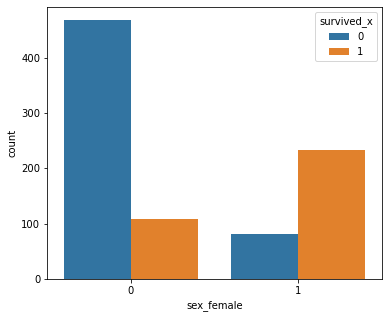

In [204]:
#Bivariate Analysis
 #bivariate analysis:survived people by gender
plt.figure(figsize = (6, 5))
sns.countplot('sex_female', hue = 'survived_x', data = train_df);

C:\Users\COSEKE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


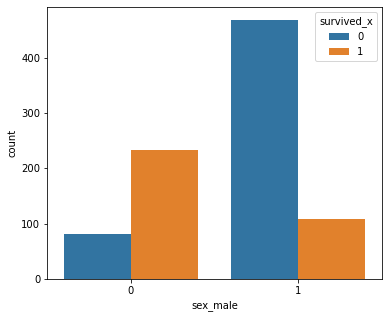

In [206]:
plt.figure(figsize = (6, 5))
sns.countplot('sex_male', hue = 'survived_x', data = train_df);

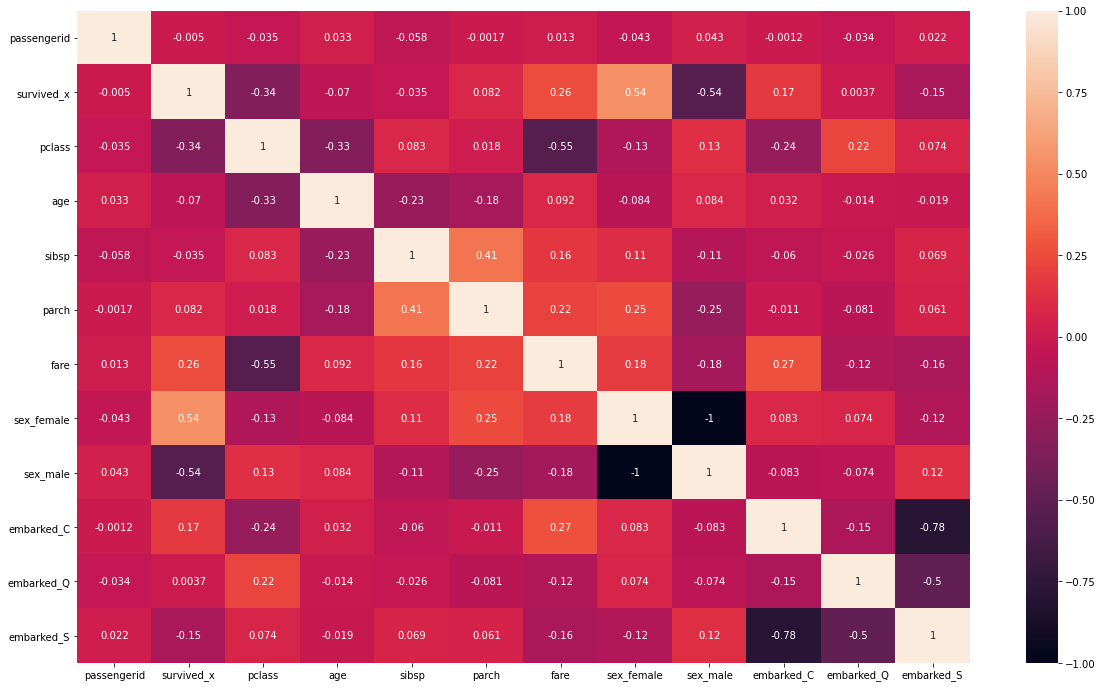

In [207]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (20, 12))
sns.heatmap(train_df.corr(), annot=True, );

In [208]:
#from above results we can tell all varaibles have a weak correlation to our target variable
#lets check the correrlation
train_df.corr()

,passengerid,survived_x,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
passengerid,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022204
survived_x,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,-0.013855,-0.019336
sibsp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
sex_female,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742


In [209]:
#Modeling
# dividing our dataset into features (X) and target (y)
X = train_df.drop(columns = ['survived_x']).values
y = train_df['survived_x'].values

print(X.shape)
print(y.shape)

(891, 11)
(891,)


In [212]:
# splitting our dataset into 80-20 train-test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


# model creation
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()

# training our model
logistic_classifier.fit(X_train, y_train)

# making predictions
y_pred_logistic = logistic_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_logistic, y_test))

0.8044692737430168


In [213]:
#Using RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.849
